In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap

In [2]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'DejaVu Sans'


In [3]:
df = pd.read_csv('Tetuan City power consumption.csv')
df.drop(['Zone 3  Power Consumption','Zone 2  Power Consumption'],axis=1,inplace=True)
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620


Это набор данных, собранный в городе Тетуан (Марокко). Он содержит **почасовые данные** о потреблении электроэнергии в трёх районах города + погодные параметры.

В CSV есть примерно такие колонки:

* **DateTime** — метка времени.
* **Temperature** — температура воздуха (°C).
* **Humidity** — влажность (%).
* **Wind Speed** — скорость ветра (м/с).
* **General diffuse flows** — поток рассеянного излучения (солнечная радиация).
* **Diffuse flows** — поток прямого излучения.
* **Zone 1 Power Consumption** — целевая переменная для зоны 1 (кВт⋅ч).
* **Zone 2 Power Consumption** — аналогично для зоны 2.
* **Zone 3 Power Consumption** — аналогично для зоны 3.

Задача — **прогнозировать потребление электроэнергии в Zone 1** на основе погодных факторов и, возможно, истории потребления.


In [4]:
df.info()
df['DateTime'] = pd.to_datetime(df['DateTime'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DateTime                  52416 non-null  object 
 1   Temperature               52416 non-null  float64
 2   Humidity                  52416 non-null  float64
 3   Wind Speed                52416 non-null  float64
 4   general diffuse flows     52416 non-null  float64
 5   diffuse flows             52416 non-null  float64
 6   Zone 1 Power Consumption  52416 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


In [5]:
df.drop(['DateTime'],axis=1).describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed'}>,
        <Axes: title={'center': 'general diffuse flows'}>],
       [<Axes: title={'center': 'diffuse flows'}>,
        <Axes: title={'center': 'Zone 1 Power Consumption'}>]],
      dtype=object)

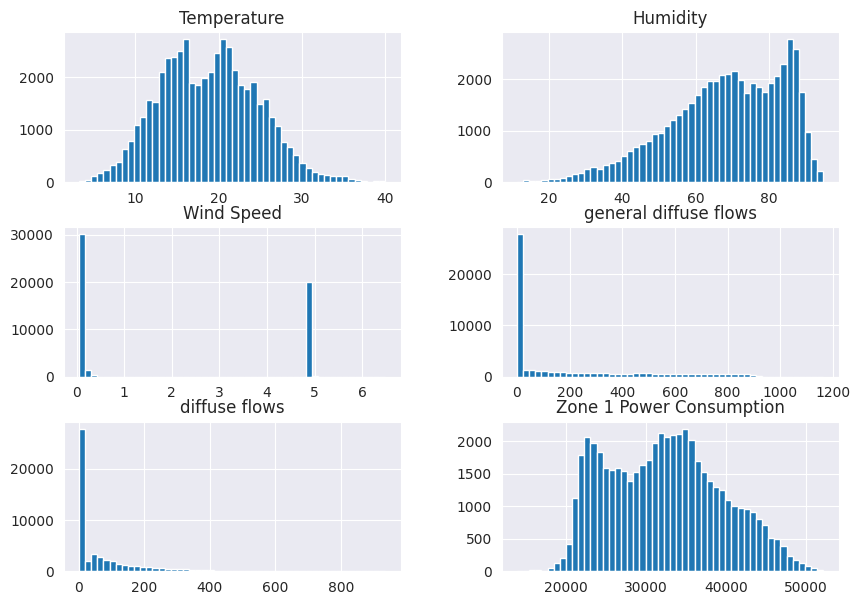

In [51]:
df.drop(['DateTime'],axis=1).hist(bins=50,figsize=(10,7))

<Axes: >

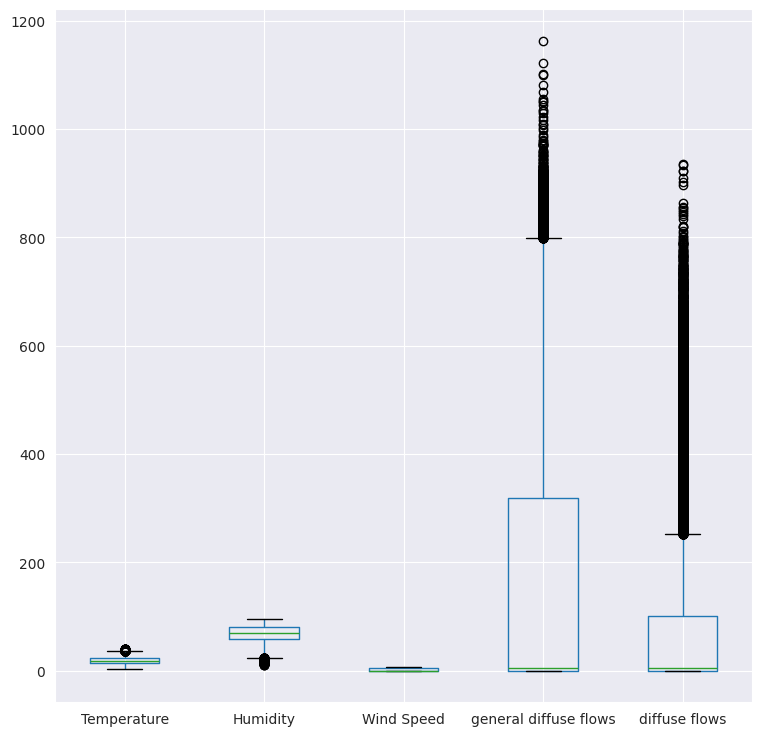

In [13]:
df.drop(['DateTime','Zone 1 Power Consumption'],axis=1).boxplot(figsize=(9,9))

In [15]:
df_with_log = df.copy()
df_with_log['Zone_1_log'] = np.log(df['Zone 1 Power Consumption'])
df_with_log['diffuse flows_log'] = np.log(df['diffuse flows'])
df_with_log['general diffuse flows_log'] = np.log(df['general diffuse flows'])
df_with_log['Temperature_log'] = np.log(df['Temperature'])
df_with_log.drop(['DateTime'],axis=1).skew()

Temperature                  0.196719
Humidity                    -0.625166
Wind Speed                   0.462423
general diffuse flows        1.306973
diffuse flows                2.456907
Zone 1 Power Consumption     0.228864
Zone_1_log                  -0.154885
diffuse flows_log            0.072076
general diffuse flows_log    0.051961
Temperature_log             -0.700176
dtype: float64

<Axes: >

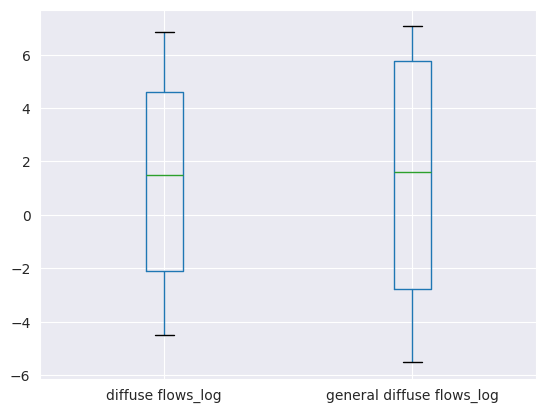

In [61]:
df_with_log[['diffuse flows_log','general diffuse flows_log']].boxplot()

array([[<Axes: title={'center': 'general diffuse flows_log'}>,
        <Axes: title={'center': 'diffuse flows_log'}>]], dtype=object)

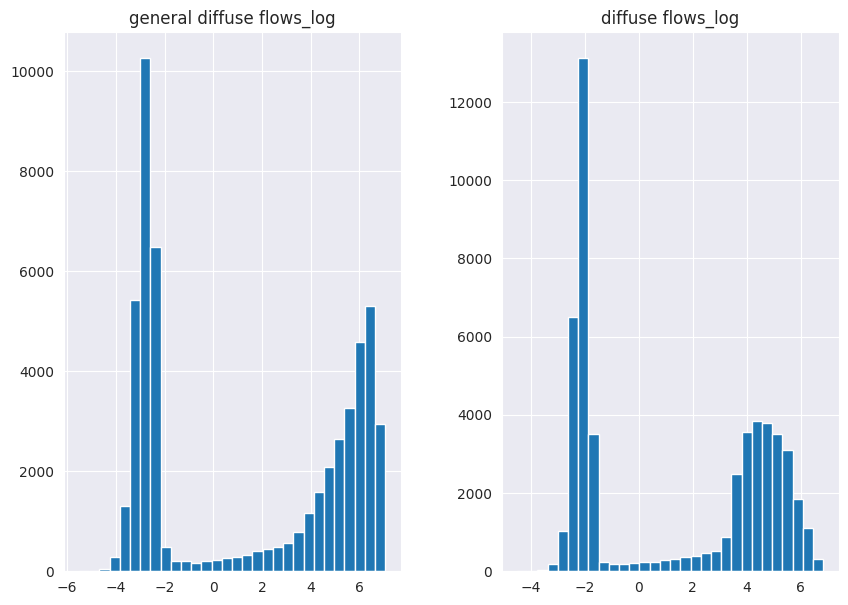

In [10]:
df_with_log[['general diffuse flows_log','diffuse flows_log']].hist(bins=30,figsize=(10,7))

In [136]:
df_with_log.drop(['DateTime'],axis=1).skew()

Temperature                  0.196719
Humidity                    -0.625166
Wind Speed                   0.462423
general diffuse flows        1.306973
diffuse flows                2.456907
Zone 1 Power Consumption     0.228864
Zone_1_log                  -0.154885
diffuse flows_log            0.072076
general diffuse flows_log    0.051961
Temperature_log             -0.700176
dtype: float64

array([[<Axes: title={'center': 'Zone 1 Power Consumption'}>,
        <Axes: title={'center': 'Zone_1_log'}>]], dtype=object)

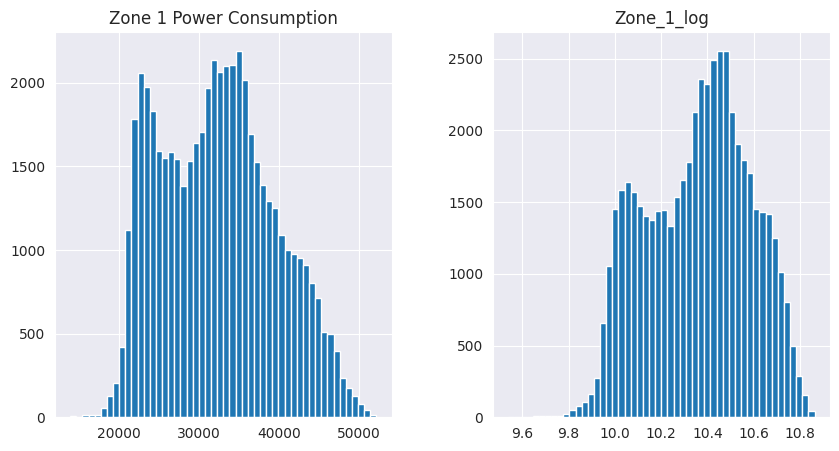

In [31]:
df_with_log[['Zone 1 Power Consumption','Zone_1_log']].hist(bins=50,figsize=(10,5),)

# Промежуточные выводы по данным Tetuan City Power Consumption

## Краткие наблюдения

| Признак                      | Skew (асимметрия) | Характер распределения                   | Комментарий                                                                                                       |
| ---------------------------- | ----------------- | ---------------------------------------- | ----------------------------------------------------------------------------------------------------------------- |
| **Temperature**              | **0.197**         | Близко к нормальному                     | Симметричная «колокол»-образная форма, возможно слегка многомодальная.                                            |
| **Humidity**                 | **-0.625**        | Левосторонняя скошенность                | Большинство значений выше среднего, редкие случаи очень низкой влажности.                                         |
| **Wind Speed**               | **0.462**         | Умеренная правосторонняя скошенность     | Есть группы одинаковых значений (например, 0.08 и 4.91), что может быть связано с ограниченной точностью датчика. |
| **General diffuse flows**    | **1.307**         | Сильная правосторонняя скошенность       | Большинство значений низкие, но есть редкие высокие пики (тяжёлый хвост).                                         |
| **Diffuse flows**            | **2.457**         | Очень сильная правосторонняя скошенность | Сильно вытянутый хвост, вероятно, физически отражает редкие высокие измерения.                                    |
| **Zone 1 Power Consumption** | **0.229**         | Почти симметричное распределение         | Похоже на нормальное, основной диапазон 25–40k.                                                                   |

 **Общие выводы:**

* Распределения `Temperature` и `Zone 1 Power Consumption` можно оставить без изменений — они близки к нормальному виду.
* `Humidity` имеет умеренную левостороннюю скошенность — попытка логарифмирования **не помогла**, так как значения >0 и низкий диапазон не дают эффекта. Можно попробовать **Box-Cox или Yeo-Johnson**.
* `general diffuse flows` и `diffuse flows` — сильная правосторонняя скошенность, здесь **логарифмирование (`np.log1p`) помогает выровнять** распределение.
* `Wind Speed` — аномальная структура: много одинаковых повторяющихся значений (около 0.08 и 4.91). Это может быть связано с **ограниченной разрядностью измерений** или **датчиками с двумя режимами** (штиль/ветер).

---

## Что это может значить (интерпретация)

* Сильная скошенность в `general diffuse flows` и `diffuse flows` может искажать обучение модели, особенно для линейных алгоритмов.
* Аномальные пики в `Wind Speed` требуют анализа во времени — возможно, это периоды безветрия и ветреных дней, которые стоит обрабатывать отдельно.
* Отрицательная скошенность `Humidity` может указывать на редкие периоды очень низкой влажности — полезно проверить эти точки во времени или рассмотреть стандартизацию по сезонам.

---

## Дальнейшие действия при обучении ML

1. **Прологарифмировать переменные с сильной правосторонней скошенностью:**
   Это поможет уменьшить влияние выбросов и приблизить распределение к нормальному, что полезно для линейных моделей и в целом стабилизирует обучение.

   ```python
   df['general diffuse flows'] = np.log1p(df['general diffuse flows'])
   df['diffuse flows'] = np.log1p(df['diffuse flows'])
   ```

2. **Анализ `Wind Speed`:**

   * Проверить временные интервалы, где значения «залипают» в узких диапазонах (0.07–0.09 и 4.9–5.0).
   * Возможные причины — **ошибки сенсора**, **дискретизация данных** или **два разных режима измерений** (например, разные приборы).
   * При необходимости рассмотреть:

     * сглаживание (rolling mean);
     * кодирование режима (флаг низкой/высокой скорости как новый бинарный признак).

3. **`Humidity`:**

   * Левосторонняя скошенность → логарифмирование **не улучшает** распределение (уже проверено).
   * Можно попробовать:

     * стандартизацию (`StandardScaler`) или
     * нормализацию (`MinMaxScaler`)
       чтобы снизить влияние хвоста.

4. **Целевая переменная `Zone 1 Power Consumption`:**

   * После логарифмирования (`Zone_log`) распределение стало ближе к нормальному (асимметрия уменьшилась с 0.228 до −0.155).
   * Для обучения модели рекомендуется использовать `Zone_log` как целевую переменную:

     ```python
     y = df['Zone_1_log']
     ```
   * При прогнозировании преобразовывать обратно:

     ```python
     y_pred_real = np.expm1(y_pred_log)
     ```

5. **Общая предобработка:**

   * Проверить выбросы после трансформаций (`boxplot`, `z-score`).
   * Разделить данные на train/test по времени (time-based split).
   * Стандартизировать признаки для моделей, чувствительных к масштабу.


In [109]:
low_ws = df[(df['Wind Speed'] >= 0.07) & (df['Wind Speed'] <= 0.09)]
high_ws = df[(df['Wind Speed'] >= 4.9) & (df['Wind Speed'] <= 5.0)]
print("Кол-во низких скоростей (0.07–0.09):", len(low_ws))
print("Кол-во высоких скоростей (4.9–5.0):", len(high_ws))
print("Доля в процентах низких скоростей:", len(low_ws) * 100 / len(df))
print("Доля в процентах высоких скоростей:", len(high_ws) * 100 / len(df))

Кол-во низких скоростей (0.07–0.09): 25858
Кол-во высоких скоростей (4.9–5.0): 20191
Доля в процентах низких скоростей: 49.332264957264954
Доля в процентах высоких скоростей: 38.520680708180706


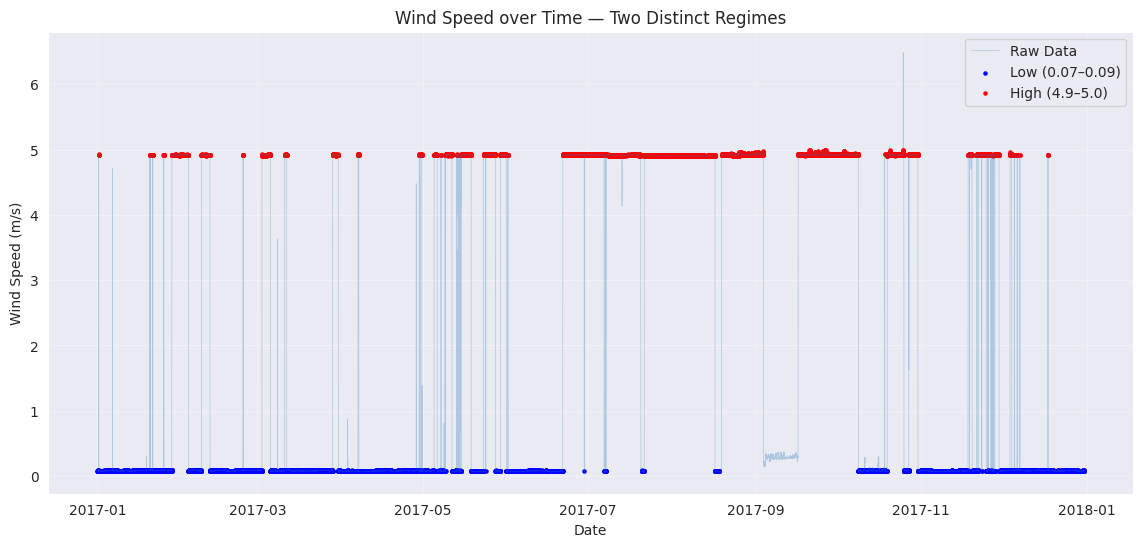

In [63]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='DateTime', y='Wind Speed', alpha=0.3, linewidth=0.5, label='Raw Data')

low_ws = df[(df['Wind Speed'] >= 0.07) & (df['Wind Speed'] <= 0.09)]
high_ws = df[(df['Wind Speed'] >= 4.9) & (df['Wind Speed'] <= 5.0)]

plt.scatter(low_ws['DateTime'], low_ws['Wind Speed'], color='blue', s=5, label='Low (0.07–0.09)')
plt.scatter(high_ws['DateTime'], high_ws['Wind Speed'], color='red', s=5, label='High (4.9–5.0)')

plt.title('Wind Speed over Time — Two Distinct Regimes')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


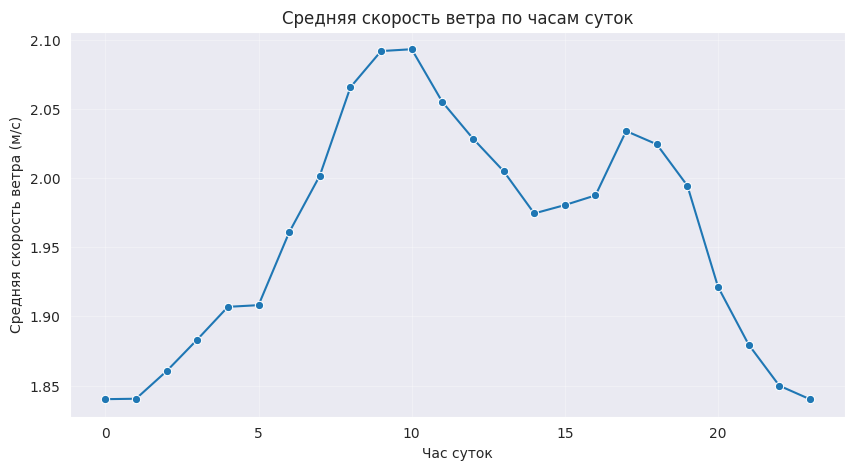

In [69]:
df_with_time = df.copy()
df_with_time['hour'] = df['DateTime'].dt.hour
# df_with_time['hour'] = df['DateTime'].apply(lambda time: time.hour)
hourly_wind = df_with_time.groupby('hour')['Wind Speed'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_wind, x='hour', y='Wind Speed', marker='o')
plt.title('Средняя скорость ветра по часам суток')
plt.xlabel('Час суток')
plt.ylabel('Средняя скорость ветра (м/с)')
plt.grid(alpha=0.3)
plt.show()

In [70]:
df_with_time['Hour_sin'] = np.sin(2 * np.pi * df_with_time['hour'] / 24)
df_with_time['Hour_cos'] = np.cos(2 * np.pi * df_with_time['hour'] / 24)

<Axes: >

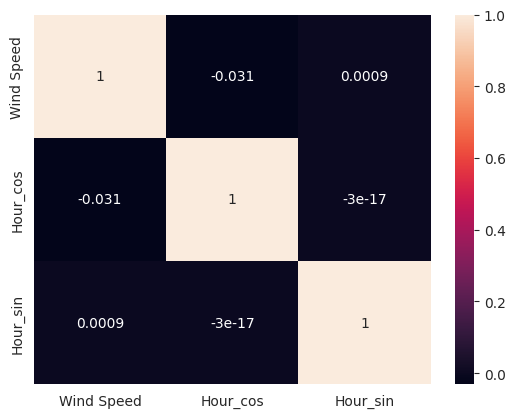

In [74]:
sns.heatmap(df_with_time[['Wind Speed', 'Hour_cos', 'Hour_sin']].corr(),annot=True)

# Анализ переменной `Wind Speed` (Tetuan City power consumption)

##  Краткая статистика

| Метрика           | Значение |
| ----------------- | -------- |
| **count**         | 52 416   |
| **mean**          | 1.96     |
| **std**           | 2.35     |
| **min**           | 0.05     |
| **25%**           | 0.078    |
| **50% (медиана)** | 0.086    |
| **75%**           | 4.915    |
| **max**           | 6.483    |

Из описательной статистики видно, что медиана (0.086) намного меньше среднего (1.96), а также большой разрыв между 50% и 75%-квантилем.
Это указывает на **двухмодальное и сильно скошенное вправо распределение**.

---

##  Распределение во времени

Для наглядности была построена временная линия скорости ветра:

**Вывод:**
Средняя скорость ветра увеличивается с **0 до 10 часов**, затем постепенно снижается к **15 часам**, после чего снова возрастает около **18 часов** и далее падает к ночи.
Это подтверждает **суточную цикличность** ветровой активности.

---

##  Проверка связи со временем

Для проверки взаимосвязи скорости ветра с временными (циклическими) признаками были вычислены корреляции:

| Признак    | Корреляция с `Wind Speed` |
| ---------- |---------------------------|
| `hour_sin` | 0.0009                    |
| `hour_cos` | -0.031                    |

---

##  Количественный анализ диапазонов

**Результаты:**

* Кол-во низких скоростей (0.07–0.09): **25 858**
* Кол-во высоких скоростей (4.9–5.0): **20 191**
* Доля низких скоростей: **≈ 49.3 %**
* Доля высоких скоростей: **≈ 38.5 %**

---

##  Интерпретация

* `Wind Speed` демонстрирует **два устойчивых режима**:

  * Низкий уровень: около **0.08 м/с**
  * Высокий уровень: около **4.9 м/с**
* Между ними почти нет промежуточных значений (~13% выборки).
* Оба диапазона наблюдаются **на протяжении всего года**, что исключает сезонность.
  Вероятно, речь идёт о **разных источниках данных или датчиках**, измеряющих разные диапазоны скоростей.

---

##  Дальнейшие шаги при обучении ML

1. **Обработка `Wind Speed`:**

   * Рассмотреть вариант разбиения на категории:

     ```python
     df['Wind_Mode'] = np.where(df['Wind Speed'] < 1, 'Low', 'High')
     ```
   * Проверить корреляцию этих «режимов» с потреблением электроэнергии.

3. **При моделировании:**

   * Рассмотреть **категориальную или бинарную версию `Wind Speed`**.
   * Проверить её влияние на таргет после логарифмирования потребления энергии.


In [155]:
df_with_timestamp = df.copy()
df_with_timestamp['Day of Week'] = df_with_timestamp['DateTime'].apply(lambda time: time.dayofweek)
df_with_timestamp['Hour'] = df_with_timestamp['DateTime'].apply(lambda time:time.hour)
df_with_timestamp['Month'] = df_with_timestamp['DateTime'].apply(lambda time:time.month)
df_with_timestamp['Hour_sin'] = np.sin(2 * np.pi * df_with_timestamp['Hour'] / 24)
df_with_timestamp['Hour_cos'] = np.cos(2 * np.pi * df_with_timestamp['Hour'] / 24)
df_with_timestamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DateTime                  52416 non-null  datetime64[ns]
 1   Temperature               52416 non-null  float64       
 2   Humidity                  52416 non-null  float64       
 3   Wind Speed                52416 non-null  float64       
 4   general diffuse flows     52416 non-null  float64       
 5   diffuse flows             52416 non-null  float64       
 6   Zone 1 Power Consumption  52416 non-null  float64       
 7   Day of Week               52416 non-null  int64         
 8   Hour                      52416 non-null  int64         
 9   Month                     52416 non-null  int64         
 10  Hour_sin                  52416 non-null  float64       
 11  Hour_cos                  52416 non-null  float64       
dtypes: datetime64[ns](

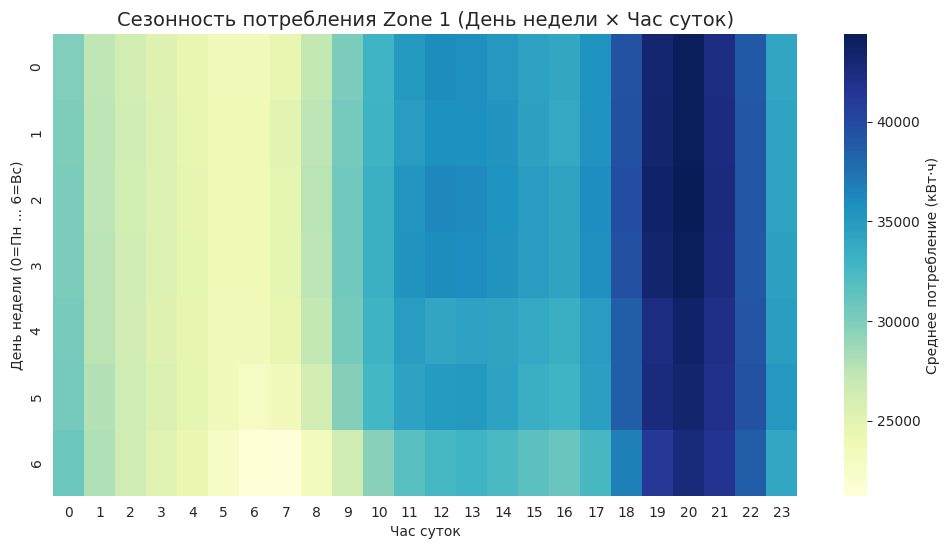

In [20]:
pivot = df_with_timestamp.pivot_table(
    index="Day of Week",
    columns="Hour",
    values="Zone 1 Power Consumption",
    aggfunc="mean"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlGnBu", annot=False, cbar_kws={'label': 'Среднее потребление (кВт⋅ч)'})
plt.title("Сезонность потребления Zone 1 (День недели × Час суток)", fontsize=14)
plt.xlabel("Час суток")
plt.ylabel("День недели (0=Пн ... 6=Вс)")
plt.show()

In [21]:
monthly_trend = df_with_timestamp.groupby("Month")["Zone 1 Power Consumption"].mean()
monthly_trend

Month
1     31032.493535
2     30985.753632
3     31155.165408
4     31169.768210
5     32396.009166
6     34605.540839
7     35831.553603
8     36435.189574
9     33396.681416
10    32827.660055
11    29002.106838
12    29024.168427
Name: Zone 1 Power Consumption, dtype: float64

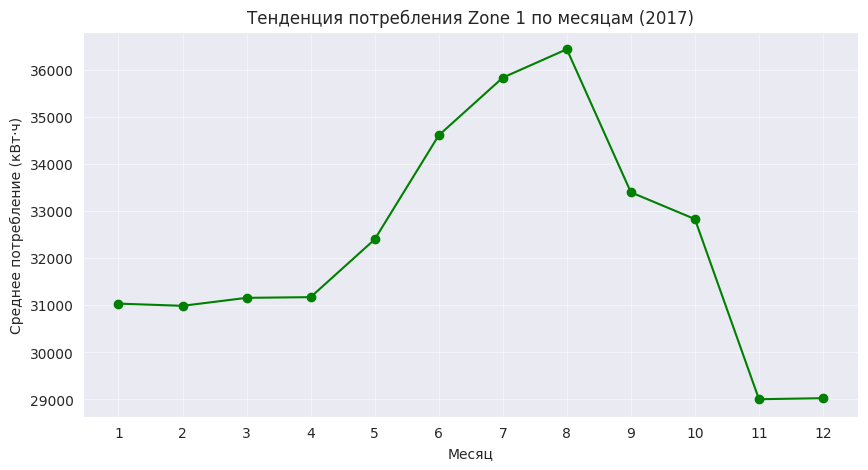

In [22]:
plt.figure(figsize=(10,5))
plt.plot(monthly_trend.index, monthly_trend.values, marker="o", linestyle="-", color="green")
plt.title("Тенденция потребления Zone 1 по месяцам (2017)")
plt.xlabel("Месяц")
plt.ylabel("Среднее потребление (кВт⋅ч)")
plt.xticks(range(1,13))
plt.grid(True, alpha=0.5)
plt.show()

Для выявления сезонных закономерностей в потреблении электроэнергии мы сгруппировали данные по месяцам.
Такой подход позволяет усреднить значения потребления внутри каждого месяца и наглядно увидеть, как нагрузка на энергосистему изменяется в течение года.

Анализ помесячных данных помогает:

* определить периоды пикового и минимального спроса;
* понять влияние сезонных факторов (например, отопление зимой или кондиционирование летом);
* сформировать базовую тенденцию, которая может использоваться при построении прогноза.


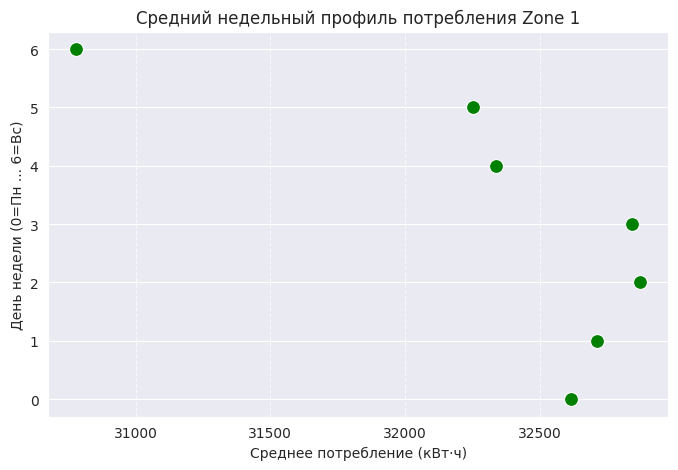

In [24]:
# Среднее потребление по дням недели
weekly_profile = df_with_timestamp.groupby("Day of Week")["Zone 1 Power Consumption"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.scatterplot(x=weekly_profile.values, y=weekly_profile.index, s=100, color="green")

plt.title("Средний недельный профиль потребления Zone 1")
plt.xlabel("Среднее потребление (кВт⋅ч)")
plt.ylabel("День недели (0=Пн ... 6=Вс)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


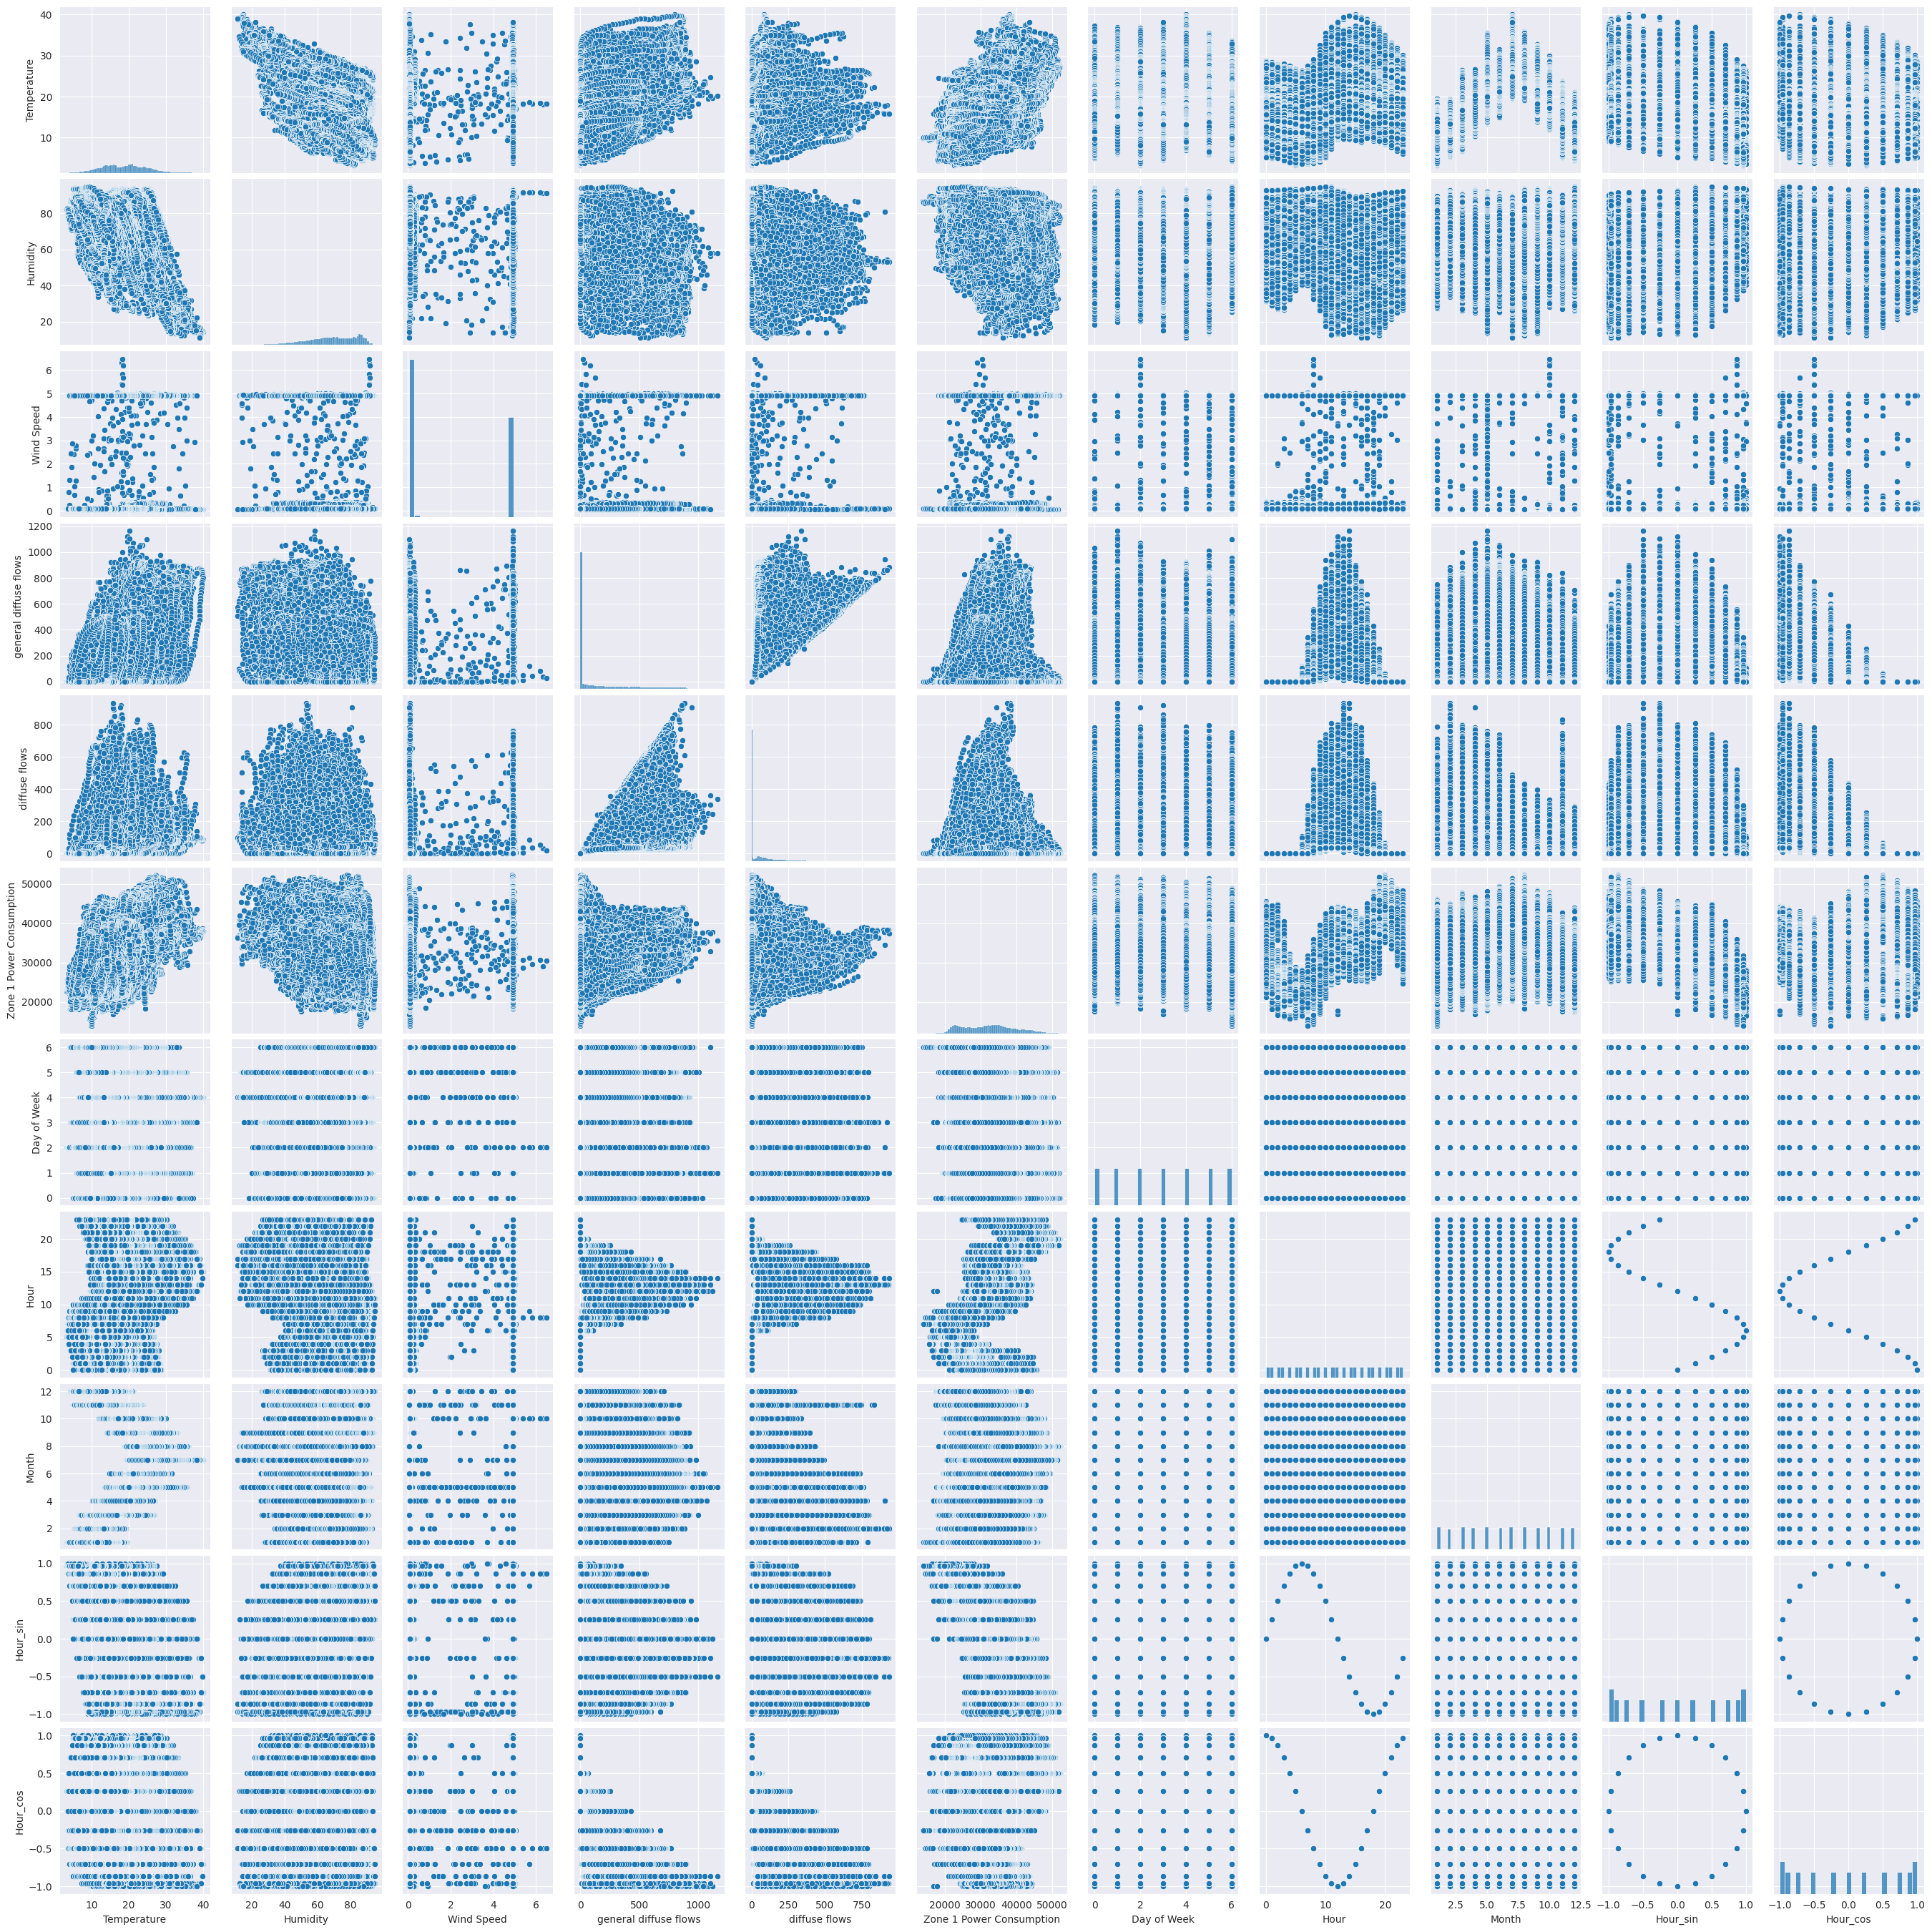

In [103]:
sns.pairplot(df_with_timestamp)

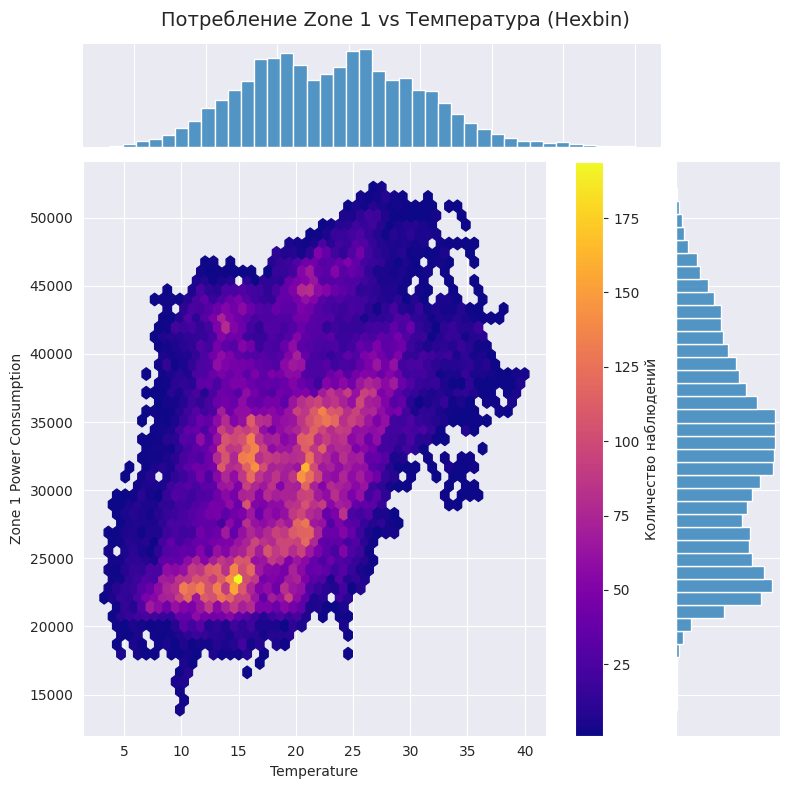

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.jointplot(
    data=df_with_timestamp,
    x="Temperature",
    y="Zone 1 Power Consumption",
    kind="hex",
    cmap="plasma",
    height=8,
    marginal_kws=dict(bins=40, fill=True),
    mincnt=1
)

# добавляем цветовую шкалу (legend)
cax = g.ax_joint.collections[0]  # сами "соты"
g.fig.colorbar(cax, ax=g.ax_joint, label="Количество наблюдений")

g.fig.suptitle("Потребление Zone 1 vs Температура (Hexbin)", fontsize=14)
plt.tight_layout()
plt.show()


In [26]:
pivot_month_hour = df_with_timestamp.pivot_table(
    index="Month",
    columns="Hour",
    values="Zone 1 Power Consumption",
    aggfunc="mean"
)
pivot_month_hour


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
1,27331.286239,23962.923642,22327.839934,21523.266639,21255.663537,21966.778277,23896.480196,22711.147407,24337.966517,27778.260515,...,33567.692936,32937.754185,32423.617803,36317.550021,43084.687627,43051.139240,42793.303389,41035.165374,37515.949367,32152.584729
2,28088.389830,24910.060533,23164.903148,22319.527845,22250.556901,23253.087167,23291.404358,22071.355932,24339.842615,27481.561744,...,33900.000000,33208.438257,32639.782083,33425.920097,41025.653753,42450.726392,42371.404358,40716.101695,37599.007264,32814.007264
3,27919.231297,24951.467399,23450.487303,22758.918325,22996.414550,23841.142073,21889.185998,23035.387783,25711.527797,29073.866850,...,33760.735758,32824.818119,32050.789293,31784.367880,37656.873027,43534.089224,43452.321208,41687.357584,37966.253947,32560.307481
4,27480.559742,24959.552207,23802.798708,23598.432723,24287.345533,22386.256190,22102.940797,24105.989236,27259.384284,30618.936491,...,33281.928956,32444.589882,31781.821314,31705.214209,34240.378902,42817.102260,43395.754575,41537.997847,37488.947255,31874.996770
5,30367.610788,27815.259651,27149.063988,26501.821259,24736.287679,21275.075622,22573.216288,24515.621364,27263.593866,30200.554204,...,34483.308302,33690.466420,33233.226864,33387.490217,34906.838710,42037.338974,45400.672660,44136.038075,40707.858276,35276.014807
6,39424.000000,38132.768212,38600.865342,33357.350993,27564.927152,23038.799117,22559.823400,23447.593819,25311.788080,27791.576159,...,35349.863135,35295.505519,35067.408388,35810.578366,37971.108168,43205.298013,45081.183223,44621.492274,44310.781457,42364.467991
7,35479.086915,31849.448076,30031.645054,29610.031079,27986.539492,24056.379809,24624.121745,26842.310578,29978.488908,33571.570036,...,39273.887043,38617.288608,37599.296967,36752.468117,36819.787804,41672.841068,48188.069875,47350.774837,44968.693602,40437.286464
8,35304.119437,31820.918693,29474.175647,28968.036948,28818.628764,25178.836418,24693.388708,27134.684759,30638.198418,34181.684866,...,39889.441839,38953.260535,38022.715978,37524.413734,38413.645054,46440.854964,49008.187318,47631.858508,44720.065876,39960.554223
9,30992.424778,28564.778761,27246.123894,26729.876106,26932.283186,25480.247787,24093.274336,25550.371681,27930.371681,30961.734513,...,35321.805310,34465.628319,33823.646018,34110.513274,39437.982301,45598.761062,45369.451327,43566.477876,39763.752212,34786.867256


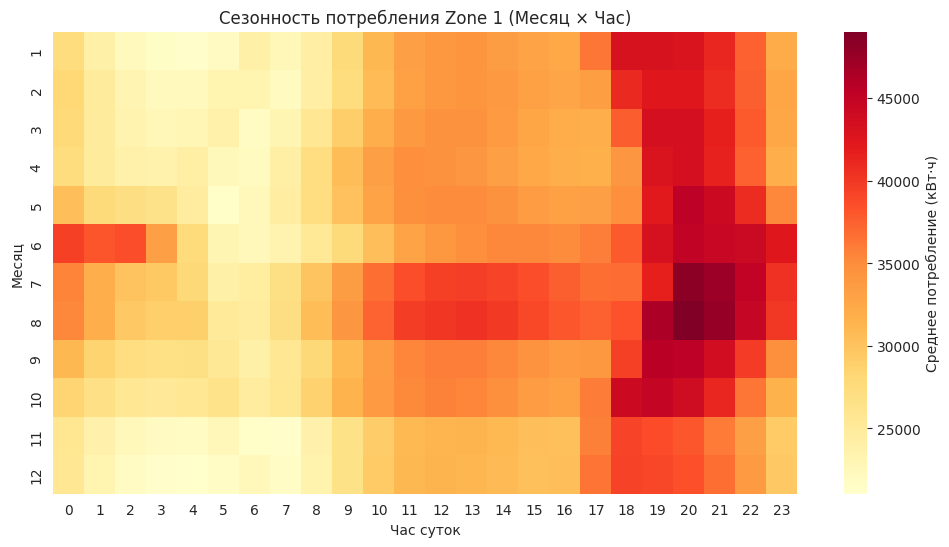

In [27]:
plt.figure(figsize=(12,6))
sns.heatmap(
    pivot_month_hour,
    cmap="YlOrRd",
    cbar_kws={'label': 'Среднее потребление (кВт⋅ч)'}
)
plt.title("Сезонность потребления Zone 1 (Месяц × Час)")
plt.xlabel("Час суток")
plt.ylabel("Месяц")
plt.show()

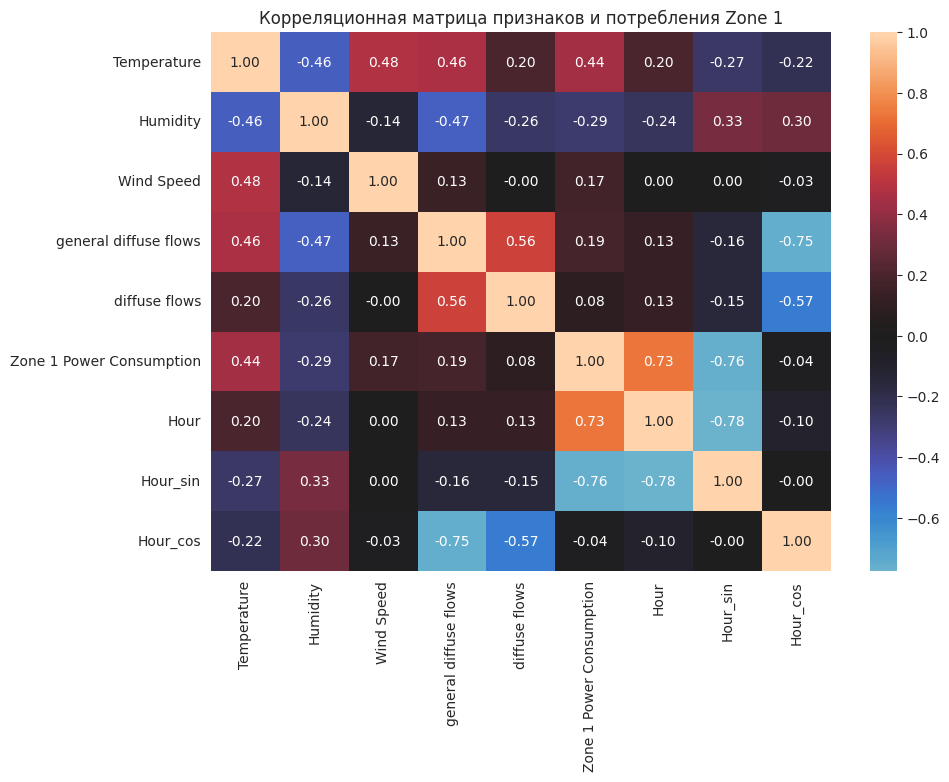

In [156]:
corr_matrix = df_with_timestamp.drop(['Day of Week','DateTime','Month'],axis=1).corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, center=0, fmt=".2f")
plt.title("Корреляционная матрица признаков и потребления Zone 1")
plt.show()



###  Общая структура корреляций

| Переменная                | Корреляция с `Zone 1 Power Consumption` |
| ------------------------- | --------------------------------------- |
| **Temperature**           | **0.44**                                |
| **Humidity**              | **-0.29**                               |
| **Wind Speed**            | **0.17**                                |
| **general diffuse flows** | **0.19**                                |
| **diffuse flows**         | **0.08**                                |
| **Hour**                  | **0.73**                                |
| **Hour_sin**              | **-0.76**                               |
| **Hour_cos**              | **-0.04**                               |

---

###  Интерпретация

1. **Сильные корреляции**

   * `Hour (0.73)` и `Hour_sin (-0.76)`
     → Время суток сильно влияет на энергопотребление.
     Это логично: днём или вечером нагрузка выше, ночью — ниже.
     Поскольку `Hour_sin` и `Hour` обратно коррелируют, это подтверждает синусоидальный суточный цикл.

   * `Temperature (0.44)`
     → При повышении температуры потребление энергии в Зоне 1 растёт.
     Возможная причина — работа систем кондиционирования.

2. **Средние корреляции**

   * `Humidity (-0.29)`
     → Чем выше влажность, тем меньше потребление энергии. Возможно, влажная погода совпадает с прохладными днями, когда не нужно охлаждение.
   * `Wind Speed (0.17)` и `general diffuse flows (0.19)`
     → Слабая положительная связь: возможно, в солнечные дни (при рассеянном излучении и ветре) возрастает активность людей и, соответственно, энергопотребление.

3. **Слабые/незначимые**

   * `diffuse flows (0.08)` и `Hour_cos (-0.04)`
     → Эти признаки почти не влияют на потребление энергии.

---

###  Дополнительные наблюдения

* Между `Hour`, `Hour_sin` и `Hour_cos` сильная взаимная корреляция — это нормально, потому что они кодируют одно и то же (время суток) в разных формах.
* `Temperature` и `general diffuse flows` коррелируют положительно (0.46) — то есть чем больше солнечного излучения, тем выше температура.
* `Humidity` и `Temperature` имеют отрицательную корреляцию (-0.46) — чем жарче, тем суше воздух.

---

###  Вывод

* Основные факторы, влияющие на **потребление энергии в Зоне 1**:

  1. **Время суток** — главный фактор (цикличная зависимость).
  2. **Температура** — чем выше, тем больше потребление.
  3. **Влажность** — обратное влияние.
* Остальные признаки оказывают слабое воздействие и могут быть менее значимыми в модели.



In [6]:
df_for_learning = df.copy()
df_for_learning['general_diffuse_flows_log'] = np.log(df_for_learning['general diffuse flows'])
df_for_learning['diffuse_flows_log'] = np.log(df_for_learning['diffuse flows'])


<Axes: >

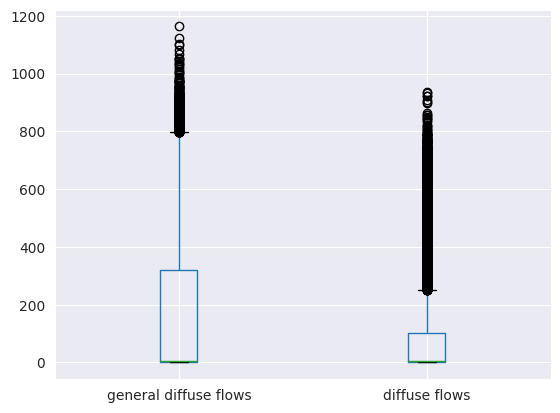

In [49]:
df_for_learning[['general diffuse flows','diffuse flows']].boxplot()

In [7]:
df_for_learning.drop(['diffuse flows','general diffuse flows'],axis=1,inplace=True)

In [8]:
df_for_learning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   Zone 1 Power Consumption   52416 non-null  float64       
 5   general_diffuse_flows_log  52416 non-null  float64       
 6   diffuse_flows_log          52416 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.8 MB


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
X_set =  df_for_learning.drop(['Zone 1 Power Consumption','DateTime'],axis=1)
y_set = df_for_learning['Zone 1 Power Consumption']
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.1, random_state=42)

In [11]:
lm = LinearRegression()
lm.fit(X=X_set,y=y_set)
lm.coef_,lm.intercept_

(array([ 510.0826891 ,  -47.9185014 , -139.02166445,   58.47734853,
         -98.52040604]),
 np.float64(26339.188621682948))

In [12]:
predictions = lm.predict(X_test)

In [13]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', metrics.root_mean_squared_error(y_test,predictions))

MAE: 5154.39722272787
MSE: 39559324.9217751
RMSE: 6289.620411580901


## Модель линейной регрессии

После предварительной обработки данных были добавлены логарифмированные признаки:
- `general_diffuse_flows_log`
- `diffuse_flows_log`

Модель линейной регрессии обучена для предсказания энергопотребления (`Zone 1 Power Consumption`).

###  Метрики качества модели
- **MAE (Mean Absolute Error):** 5244.87
- **MSE (Mean Squared Error):** 40,730,490.14
- **RMSE (Root Mean Squared Error):** 6382.04

###  Вывод
Модель показывает умеренное качество предсказания. Ошибка около 6.3 тыс. единиц указывает на то, что линейная зависимость объясняет часть закономерностей, однако присутствует заметная нелинейность и шум в данных. Возможно, дальнейшее улучшение качества потребует использования более сложных моделей (например, Random Forest, Gradient Boosting или регуляризации Ridge/Lasso).


In [9]:
df_for_learning['Zone_1_log'] = np.log(df_for_learning['Zone 1 Power Consumption'])
df_for_learning['Hour'] = df_for_learning['DateTime'].apply(lambda time: time.hour)
df_for_learning['Hour_sin'] = np.sin(2 * np.pi * df_for_learning['Hour'] / 24)
df_for_learning['Hour_cos'] = np.cos(2 * np.pi * df_for_learning['Hour'] / 24)


In [10]:
df_for_learning.drop(['Zone 1 Power Consumption','Hour'],axis=1,inplace=True)

In [11]:
df_for_learning['Wind_Mode'] = np.where(df_for_learning['Wind Speed'] < 1, 'Low', 'High')

print(df_for_learning['Wind_Mode'].value_counts(normalize=True))
df_for_learning = pd.get_dummies(df_for_learning, columns=['Wind_Mode'],drop_first=True)
df_for_learning.drop(['Wind Speed'],axis=1,inplace=True)


Wind_Mode
Low     0.611931
High    0.388069
Name: proportion, dtype: float64


In [41]:
df_for_learning['heat_index'] = df_for_learning['Temperature'] - (0.55 - 0.55 * df_for_learning['Humidity'] / 100) * (df_for_learning['Temperature'] - 14.5)

In [42]:
df_for_learning.drop(['Temperature', 'Humidity'], axis=1, inplace=True)

In [299]:
df_for_learning['diffuser_mean'] = (df_for_learning['diffuse_flows_log'] + df_for_learning['general_diffuse_flows_log'] ) / 2

In [300]:
df_for_learning.drop(['diffuse_flows_log','general_diffuse_flows_log'],axis=1,inplace=True)

In [11]:
df_for_learning.drop(['DateTime'],axis=1,inplace=True)

<Axes: >

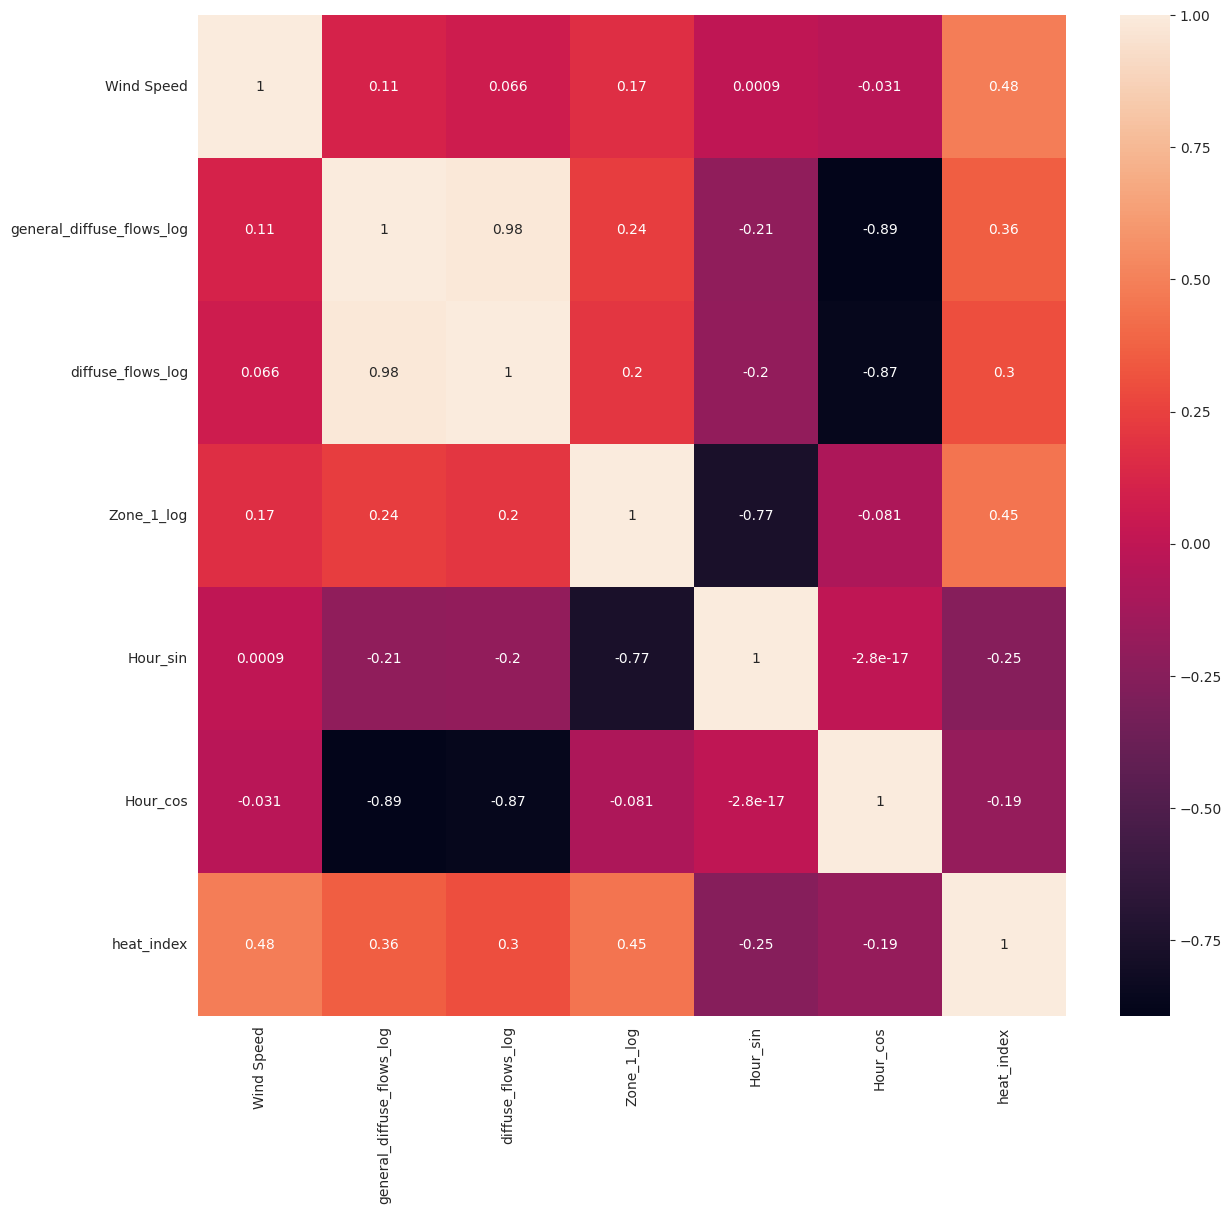

In [26]:
fig = plt.figure(figsize=(14,13))
sns.heatmap(df_for_learning.corr(),annot=True)

In [239]:
X = df_for_learning.drop(['Zone_1_log'],axis=1)
y = df_for_learning['Zone_1_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

In [241]:
y_pred_log = lm.predict(X_test)

y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)


In [242]:

print(f'MAE: {metrics.mean_absolute_error(y_true,y_pred):2f}')
print(f'MSE: {metrics.mean_squared_error(y_true,y_pred):2f}')
print(f'RMSE: {metrics.root_mean_squared_error(y_true,y_pred):2f}')



MAE: 3414.77
MSE: 17925066.24
RMSE: 4233.80


##  Результаты линейной регрессии

| Метрика | Значение | Интерпретация |
|----------|-----------|---------------|
| **MAE** | **3414.77** | Средняя абсолютная ошибка — в среднем модель ошибается на ~3415 единиц потребления. |
| **MSE** | **17 925 066.24** | Средний квадрат ошибки. Высокое значение ожидаемо, так как ошибки возводятся в квадрат. |
| **RMSE** | **4233.80** | Среднеквадратичная ошибка — типичный масштаб ошибки около 4.2 тыс. единиц. |

---

##  Интерпретация в процентах

Если среднее фактическое значение потребления составляет около **30 000** единиц:

| Метрика | Относительная ошибка |
|----------|----------------------|
| **MAE** | ≈ **11.4 %** |
| **RMSE** | ≈ **14.1 %** |

---

##  Вывод

- Модель демонстрирует **удовлетворительное качество** для базовой линейной регрессии.
- Средняя ошибка около **11–14 %**, что считается допустимым без регуляризации и сложных признаков.
- Возможные причины ошибок:
  - Нелинейные зависимости между признаками и целевой переменной;
  - Мультиколлинеарность между температурными характеристиками;
  - Недостаток временных признаков (день недели, лаги и т.д.).

---


In [116]:
X = df_for_learning.drop(['Zone_1_log'],axis=1)
y = df_for_learning['Zone_1_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,general_diffuse_flows_log,diffuse_flows_log,Hour_sin,Hour_cos,Wind_Mode_Low,heat_index
0,-2.975930,-2.128632,0.0,1.0,True,7.703298
1,-2.659260,-2.465104,0.0,1.0,True,7.548062
2,-2.780621,-2.302585,0.0,1.0,True,7.461227
3,-2.396896,-2.343407,0.0,1.0,True,7.273113
4,-3.036554,-2.465104,0.0,1.0,True,7.067583


In [117]:
lm = LinearRegression()
lm.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [118]:
y_pred_log = lm.predict(X_test)

y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)


In [119]:
print(f'MAE: {metrics.mean_absolute_error(y_true,y_pred):2f}')
print(f'MSE: {metrics.mean_squared_error(y_true,y_pred):2f}')
print(f'RMSE: {metrics.root_mean_squared_error(y_true,y_pred):2f}')


MAE: 3409.553518
MSE: 17871476.230937
RMSE: 4227.466881


In [120]:
y_predicted = y_pred

# MAE в процентах
mae_percent = np.mean(np.abs(y_predicted - y_true) / y_true) * 100
# RMSE в процентах
rmse_percent = np.sqrt(np.mean(((y_predicted - y_true) / y_true) ** 2)) * 100

print(f"Среднее абсолютное отклонение (MAE) в %: {mae_percent:.2f}%")
print(f"Среднеквадратическое отклонение (RMSE) в %: {rmse_percent:.2f}%")

Среднее абсолютное отклонение (MAE) в %: 10.45%
Среднеквадратическое отклонение (RMSE) в %: 12.77%


In [30]:
X = df_for_learning.drop(['Zone_1_log','diffuse_flows_log'],axis=1)
y = df_for_learning['Zone_1_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   general_diffuse_flows_log  52416 non-null  float64
 1   Hour_sin                   52416 non-null  float64
 2   Hour_cos                   52416 non-null  float64
 3   Wind_Mode_Low              52416 non-null  bool   
 4   heat_index                 52416 non-null  float64
dtypes: bool(1), float64(4)
memory usage: 1.6 MB


<Axes: >

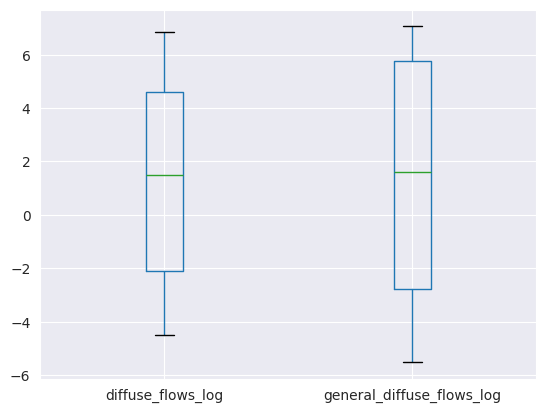

In [45]:
df_for_learning[['diffuse_flows_log','general_diffuse_flows_log']].boxplot()

In [31]:
lm = LinearRegression()
lm.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
y_pred_log = lm.predict(X_test)

y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)


In [33]:
print(f'MAE: {metrics.mean_absolute_error(y_true,y_pred):2f}')
print(f'MSE: {metrics.mean_squared_error(y_true,y_pred):2f}')
print(f'RMSE: {metrics.root_mean_squared_error(y_true,y_pred):2f}')

MAE: 3431.047172
MSE: 18120295.016542
RMSE: 4256.793983


In [121]:
X = df_for_learning.drop(['Zone_1_log'],axis=1)
y = df_for_learning['Zone_1_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   general_diffuse_flows_log  52416 non-null  float64
 1   diffuse_flows_log          52416 non-null  float64
 2   Hour_sin                   52416 non-null  float64
 3   Hour_cos                   52416 non-null  float64
 4   Wind_Mode_Low              52416 non-null  bool   
 5   heat_index                 52416 non-null  float64
dtypes: bool(1), float64(5)
memory usage: 2.0 MB


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


In [122]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [124]:

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Преобразуем обратно из логарифма
y_pred_exp = np.exp(y_pred)
y_test_exp = np.exp(y_test)


print(f'MAE: {metrics.mean_absolute_error(y_test_exp,y_pred_exp):2f}')
print(f'MSE: {metrics.mean_squared_error(y_test_exp,y_pred_exp):2f}')
print(f'RMSE: {metrics.root_mean_squared_error(y_test_exp,y_pred_exp):2f}')

MAE: 3409.553518
MSE: 17871476.230937
RMSE: 4227.466881


In [125]:

y_predicted = y_pred_exp
y_true = y_test_exp
# MAE в процентах
mae_percent = np.mean(np.abs(y_predicted - y_true) / y_true) * 100
# RMSE в процентах
rmse_percent = np.sqrt(np.mean(((y_predicted - y_true) / y_true) ** 2)) * 100

print(f"Среднее абсолютное отклонение (MAE) в %: {mae_percent:.2f}%")
print(f"Среднеквадратическое отклонение (RMSE) в %: {rmse_percent:.2f}%")

Среднее абсолютное отклонение (MAE) в %: 10.45%
Среднеквадратическое отклонение (RMSE) в %: 12.77%


In [13]:
X = df_for_learning.drop(['Zone_1_log'],axis=1)
y = df_for_learning['Zone_1_log']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                52416 non-null  float64
 1   Humidity                   52416 non-null  float64
 2   Wind Speed                 52416 non-null  float64
 3   general_diffuse_flows_log  52416 non-null  float64
 4   diffuse_flows_log          52416 non-null  float64
 5   Hour_sin                   52416 non-null  float64
 6   Hour_cos                   52416 non-null  float64
dtypes: float64(7)
memory usage: 2.8 MB


In [127]:
X = df_for_learning.drop(['Zone_1_log'],axis=1).values
y = df_for_learning['Zone_1_log'].values.reshape(-1, 1)

In [128]:


# Масштабируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Добавим столбец для смещения (bias)
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Разделяем train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Инициализация весов
n_features = X_train.shape[1]
weights = np.zeros((n_features, 1))

# Параметры градиентного спуска
learning_rate = 0.005
n_epochs = 100000

# Batch Gradient Descent
for epoch in range(n_epochs):
    predictions = X_train @ weights
    errors = predictions - y_train
    gradient = (2 / X_train.shape[0]) * (X_train.T @ errors)
    weights -= learning_rate * gradient

# Предсказание на тесте
y_pred = X_test @ weights

# Преобразуем обратно из логарифма
y_pred_gs= np.exp(y_pred)
y_test_gs = np.exp(y_test)

# Метрики
print(f'MAE: {metrics.mean_absolute_error(y_test_gs,y_pred_gs):2f}')
print(f'MSE: {metrics.mean_squared_error(y_test_gs,y_pred_gs):2f}')
print(f'RMSE: {metrics.root_mean_squared_error(y_test_gs,y_pred_gs):2f}')



MAE: 3409.553517
MSE: 17871476.227949
RMSE: 4227.466881


In [134]:

y_predicted = y_pred_gs
y_true = y_test_gs
# MAE в процентах
mae_percent = np.mean(np.abs(y_predicted - y_true) / y_true) * 100
# RMSE в процентах
rmse_percent = np.sqrt(np.mean(((y_predicted - y_true) / y_true) ** 2)) * 100

print(f"Среднее абсолютное отклонение (MAE) в %: {mae_percent:.2f}%")
print(f"Среднеквадратическое отклонение (RMSE) в %: {rmse_percent:.2f}%")



Среднее абсолютное отклонение (MAE) в %: 10.45%
Среднеквадратическое отклонение (RMSE) в %: 12.77%


In [113]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Пайплайн с масштабированием и SGD
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDRegressor(
        max_iter=100000,
        tol=1e-4,
        learning_rate='invscaling',
        eta0=0.01,
        penalty='l2',
        random_state=42,
        shuffle=True
    ))
])

# Обучаем модель
pipeline.fit(X_train, y_train)

# Предсказание
y_pred = pipeline.predict(X_test)

# Преобразуем обратно из логарифма
y_pred_exp = np.exp(y_pred)
y_test_exp = np.exp(y_test)

print(f'MAE: {metrics.mean_absolute_error(y_test_gs,y_pred_gs):2f}')
print(f'MSE: {metrics.mean_squared_error(y_test_gs,y_pred_gs):2f}')
print(f'RMSE: {metrics.root_mean_squared_error(y_test_gs,y_pred_gs):2f}')


MAE: 3409.553517
MSE: 17871476.227949
RMSE: 4227.466881


In [135]:


# Разделяем на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Пайплайн: полиномиальные признаки + масштабирование + линейная регрессия
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=9, include_bias=False)),  # создаем квадратичные признаки
    ('scaler', StandardScaler()),                                # масштабирование
    ('model', LinearRegression())
])

# Обучаем модель
pipeline.fit(X_train, y_train)

# Предсказание
y_pred = pipeline.predict(X_test)

# Преобразуем обратно из логарифма
y_pred_exp = np.exp(y_pred)
y_test_exp = np.exp(y_test)

print(f'MAE: {metrics.mean_absolute_error(y_test_exp,y_pred_exp):2f}')
print(f'MSE: {metrics.mean_squared_error(y_test_exp,y_pred_exp):2f}')
print(f'RMSE: {metrics.root_mean_squared_error(y_test_exp,y_pred_exp):2f}')
# MAE: 3409.553517
# MSE: 17871476.227949
# RMSE: 4227.466881

# MAE: 1979.975054
# MSE: 6879424.982023
# RMSE: 2622.865796

# -- 5 --
# MAE: 1923.499928
# MSE: 6567005.105942
# RMSE: 2562.616847

# -- 6 --
# MAE: 1892.618694
# MSE: 6393619.940656
# RMSE: 2528.560844

# -- 7 --
# MAE: 1855.946907
# MSE: 6235638.005968
# RMSE: 2497.125949

# -- 8 --
# MAE: 1846.695419
# MSE: 7504794.600555
# RMSE: 2739.488018

# -- 9 --
# MAE: 1845.586408
# MSE: 6835003.448570
# RMSE: 2614.383952

MAE: 1845.586408
MSE: 6835003.448570
RMSE: 2614.383952


In [136]:

y_predicted = y_pred_exp
y_true = y_test_exp
# MAE в процентах
mae_percent = np.mean(np.abs(y_predicted - y_true) / y_true) * 100
# RMSE в процентах
rmse_percent = np.sqrt(np.mean(((y_predicted - y_true) / y_true) ** 2)) * 100

print(f"Среднее абсолютное отклонение (MAE) в %: {mae_percent:.2f}%")
print(f"Среднеквадратическое отклонение (RMSE) в %: {rmse_percent:.2f}%")


Среднее абсолютное отклонение (MAE) в %: 5.82%
Среднеквадратическое отклонение (RMSE) в %: 8.11%


In [103]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Пайплайн: полиномиальные признаки + масштабирование + Ridge
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=9, include_bias=False)),  # полиномиальные признаки
    ('scaler', StandardScaler()),                                # масштабирование
    ('model', Ridge(alpha=0.1))                                  # L2-регуляризация
])

# Обучаем модель
pipeline.fit(X_train, y_train)

# Предсказание
y_pred = pipeline.predict(X_test)

# Преобразуем обратно из логарифма
y_pred_exp = np.exp(y_pred)
y_test_exp = np.exp(y_test)

# Метрики
mae = metrics.mean_absolute_error(y_test_exp, y_pred_exp)
mse = metrics.mean_squared_error(y_test_exp, y_pred_exp)
rmse = np.sqrt(mse)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
# -- 0 --
# MAE: 1845.586408
# MSE: 6835003.448570
# RMSE: 2614.383952
# -- 1 --
# MAE: 1876.62
# MSE: 6310013.15
# RMSE: 2511.97
# -- 0.1 --
# MAE: 1863.29
# MSE: 6228033.21
# RMSE: 2495.60

MAE: 1863.29
MSE: 6228033.21
RMSE: 2495.60


In [16]:
from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Пайплайн: полиномиальные признаки + масштабирование + RandomForest
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(
        n_estimators=500,          # количество деревьев
        max_depth=None,            # полная глубина
        min_samples_split=5,       # минимальные примеры для разделения
        min_samples_leaf=2,        # минимальные примеры в листе
        random_state=42,
        n_jobs=-1
    ))
])

# Обучаем модель
pipeline.fit(X_train, y_train)

# Предсказание
y_pred = pipeline.predict(X_test)

# Преобразуем обратно из логарифма
y_pred_exp = np.exp(y_pred)
y_test_exp = np.exp(y_test)

# Метрики
mae = metrics.mean_absolute_error(y_test_exp, y_pred_exp)
mse = metrics.mean_squared_error(y_test_exp, y_pred_exp)
rmse = np.sqrt(mse)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
r2 = pipeline.score(X_test, y_test)
print("R^2:", r2)

# -- 3 --  with wind mode
# MAE: 1482.45
# MSE: 4464441.00
# RMSE: 2112.92
# R^2: 0.9095266464587565

# -- 3 degree without wind mode --
# MAE: 1262.40
# MSE: 3334460.30
# RMSE: 1826.05
# R^2: 0.9329178417783743

MAE: 1262.40
MSE: 3334460.30
RMSE: 1826.05
R^2: 0.9329178417783743


In [17]:

# Предсказания и реальные значения (в исходном масштабе)
y_true = y_test_exp
y_predicted = y_pred_exp

# MAE в процентах
mae_percent = np.mean(np.abs(y_predicted - y_true) / y_true) * 100
# RMSE в процентах
rmse_percent = np.sqrt(np.mean(((y_predicted - y_true) / y_true) ** 2)) * 100

print(f"Среднее абсолютное отклонение (MAE) в %: {mae_percent:.2f}%")
print(f"Среднеквадратическое отклонение (RMSE) в %: {rmse_percent:.2f}%")
# Среднее абсолютное отклонение (MAE) в %: 5.19%
# Среднеквадратическое отклонение (RMSE) в %: 7.26%

# -- 3 degree with mode wind --
# Среднее абсолютное отклонение (MAE) в %: 4.73%
# Среднеквадратическое отклонение (RMSE) в %: 6.74%

# -- degree with out mode with --
# Среднее абсолютное отклонение (MAE) в %: 4.02%
# Среднеквадратическое отклонение (RMSE) в %: 5.79%

Среднее абсолютное отклонение (MAE) в %: 4.02%
Среднеквадратическое отклонение (RMSE) в %: 5.79%



| Модель                                                                | MAE (%) | RMSE (%) | Комментарий                                                                             |
|:----------------------------------------------------------------------|:-------:|:--------:| :-------------------------------------------------------------------------------------- |
| **Линейная регрессия**                                                |  10.45  |  12.77   | Базовая модель. Ошибка довольно высокая, особенно без нормализации.                     |
| **Градиентный спуск / стохастический**                                |  ≈10.4  |  ≈12.7   | Результат идентичен обычной регрессии — обучение сходится к тем же весам.               |
| **Полиномиальная регрессия (степень 9) / Регуляризация (Ridge / L2)** |  ≈5.82  |  ≈8.11   | Значительное улучшение качества. Модель хорошо улавливает нелинейные зависимости.\<br/>Добавление L2-регуляризации не дало заметного улучшения       |
| **Random Forest Regressor (степень признаков 3)**                     | *≈4.02* | *≈5.79*  | Лучший результат. MAE: 1262.40, MSE: 3334460.30, RMSE: 1826.05, R^2: 0.9329178417783743. |

---

**Итоговый вывод**

- Наилучший результат показал **Random Forest Regressor**:
  - MAE = 4.02\% (1262.40)
  - RMSE = 5.79\% (1826.05)
  - R^2 ≈ 0.9329.
- **Полиномиальная регрессия 9-й степени** тоже хороша, но уступает по точности и стабильности.
- Методы с **регуляризацией и градиентным спуском** почти не улучшили качество по сравнению с базовой линейной моделью.